In [1]:
import time

import matplotlib.pyplot as plt
import torch

from src.model.activation import Linear, Relu
from src.model.base import NeuralNetwork
from src.model.layer import FullyConnected, Input
from src.model.loss import MeanSquaredError
from src.model.metric import R2Score
from src.model.optimizer import SGD, Adam

# Functions (2d and 3d) whose values we will predict using a neural network

In [2]:
def func_quad(arg):
    return 0.5 * arg**2 + 2 * arg - 1

def func_linear(arg):
    return -1.0 * arg - 1

def func_quad_3d(arg_x, arg_y):
    return 0.2 * arg_x**2 + 0.2 * arg_y**2

def func_sin_plus_cos_3d(arg_x, arg_y):
    return torch.sin(arg_x) + torch.cos(arg_y)

# Helper functions for plotting graphs of functions and displaying changes in loss and R2 score with the change of epochs

In [3]:
def plot_func(x, y, title):
    plt.figure(figsize=(10, 8))
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.grid(True)
    plt.show()

In [4]:
def plot_func_3d(x, y, z, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(x, y, z, cmap="viridis")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("f(X, Y)")
    plt.title(title)
    plt.grid(True)
    plt.show()

In [5]:
def plot_loss(epoch, train_loss, test_loss, title):
    plt.figure(figsize=(10, 8))
    plt.plot(epoch, train_loss, color='r', label='Train')
    plt.plot(epoch, test_loss, color='g', label='Test')
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

In [6]:
def plot_r2_score(epoch, train_metric, test_metric, title):
    plt.figure(figsize=(10, 8))
    plt.plot(epoch, train_metric, color='r', label='Train')
    plt.plot(epoch, test_metric, color='g', label='Test')
    plt.xlabel('epoch')
    plt.ylabel('R2 score')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

# Functions for generating train/test data

In [7]:
def generate_train_test_data(func):

    x = torch.linspace(-5, 5, 100)

    train_data = []

    for x_i in x:
        train_data.append(
            {
                "input": [x_i],
                "output": [func(x_i)],
            }
        )

    x = torch.linspace(-5, 5, 30)

    test_data = []

    for x_i in x:
        test_data.append(
            {
                "input": [x_i],
                "output": [func(x_i)],
            }
        )

    return train_data, test_data

In [8]:
def generate_train_test_data_3d(func_3d):

    x = torch.linspace(-5, 5, 50)
    y = torch.linspace(-5, 5, 50)
    x, y = torch.meshgrid(x, y, indexing="ij")

    train_data = []

    for i in range(x.size(0)):
        for j in range(x.size(1)):
            train_data.append(
                {
                    "input": [x[i][j], y[i][j]],
                    "output": [func_3d(x[i][j], y[i][j])],
                }
            )

    x = torch.linspace(-5, 5, 30)
    y = torch.linspace(-5, 5, 30)
    x, y = torch.meshgrid(x, y, indexing="ij")

    test_data = []

    for i in range(x.size(0)):
        for j in range(x.size(1)):
            test_data.append(
                {
                    "input": [x[i][j], y[i][j]],
                    "output": [func_3d(x[i][j], y[i][j])],
                }
            )

    return train_data, test_data

# Creating model for predicting values of the linear function "y = −x − 1" and ploting graphs and changes for loss and r2 score

In [9]:
train_dataset, test_dataset = generate_train_test_data(func_linear)

layers = [
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(1),
    layers,
    optimizer=SGD(),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 50

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=1, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/50, train loss: 2.729, train R2 score: 0.358, test loss: 1.316, test R2 score: 0.7045
Epoch: 2/50, train loss: 0.5253, train R2 score: 0.8764, test loss: 0.1044, test R2 score: 0.9766
Epoch: 3/50, train loss: 0.0357, train R2 score: 0.9916, test loss: 0.015, test R2 score: 0.9966
Epoch: 4/50, train loss: 0.0119, train R2 score: 0.9972, test loss: 0.0108, test R2 score: 0.9976
Epoch: 5/50, train loss: 0.0095, train R2 score: 0.9978, test loss: 0.0088, test R2 score: 0.998
Epoch: 6/50, train loss: 0.0079, train R2 score: 0.9982, test loss: 0.0074, test R2 score: 0.9983
Epoch: 7/50, train loss: 0.0067, train R2 score: 0.9984, test loss: 0.0063, test R2 score: 0.9986
Epoch: 8/50, train loss: 0.0057, train R2 score: 0.9987, test loss: 0.0054, test R2 score: 0.9988
Epoch: 9/50, train loss: 0.0049, train R2 score: 0.9988, test loss: 0.0048, test R2 score: 0.9989
Epoch: 10/50, train loss: 0.0044, train R2 score: 0.999, test loss: 0.0042, test R2 score: 0.9991
Epoch: 11/50, train loss:

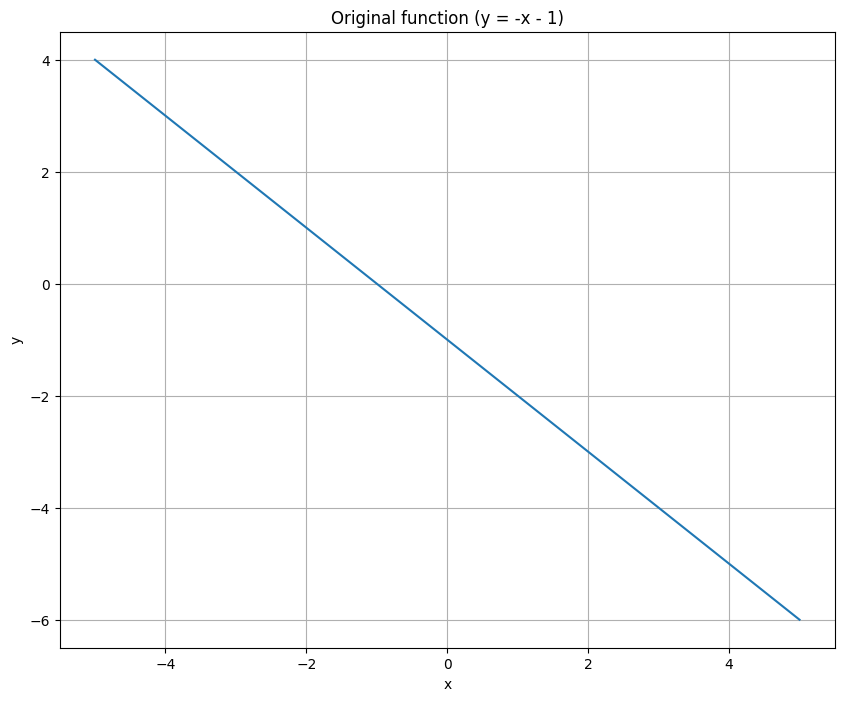

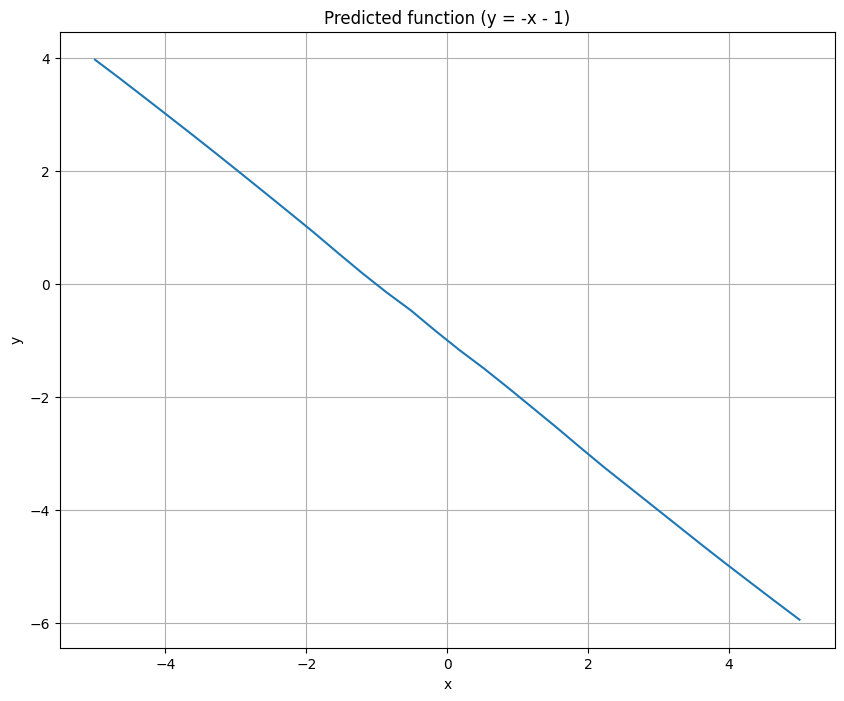

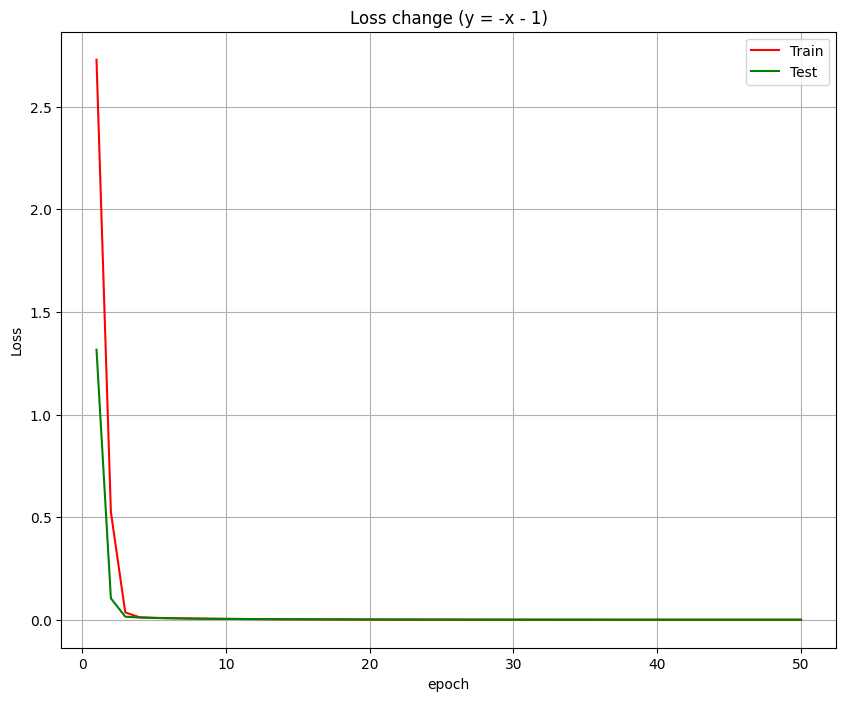

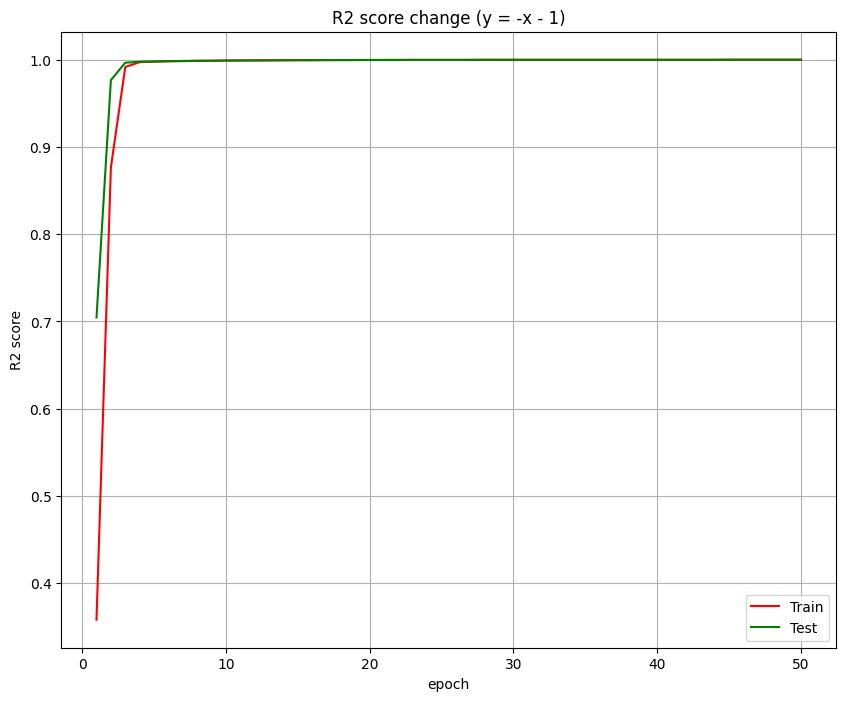

In [10]:
plot_func(
    [d["input"][0].item() for d in train_dataset],
    [d["output"][0].item() for d in train_dataset],
    "Original function (y = -x - 1)",
)

plot_func(
    [d["input"][0].item() for d in test_dataset],
    [pred[0].item() for pred in prediction],
    "Predicted function (y = -x - 1)"
)

plot_loss(epoch, train_loss, test_loss, 'Loss change (y = -x - 1)')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (y = -x - 1)')

# Creating model for predicting values of the quadratic function "y = 0.5 * x**2 + 2 * x - 1" and ploting graphs and changes for loss and r2 score

In [11]:
train_dataset, test_dataset = generate_train_test_data(func_quad)

layers = [
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(1),
    layers,
    optimizer=Adam(learning_rate=0.0005),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 30

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=1, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/30, train loss: 17.6204, train R2 score: 0.2728, test loss: 2.9627, test R2 score: 0.8848
Epoch: 2/30, train loss: 1.4741, train R2 score: 0.9392, test loss: 0.7835, test R2 score: 0.9695
Epoch: 3/30, train loss: 0.6469, train R2 score: 0.9733, test loss: 1.1216, test R2 score: 0.9564
Epoch: 4/30, train loss: 0.4291, train R2 score: 0.9823, test loss: 0.43, test R2 score: 0.9833
Epoch: 5/30, train loss: 0.3549, train R2 score: 0.9854, test loss: 0.2864, test R2 score: 0.9889
Epoch: 6/30, train loss: 0.2408, train R2 score: 0.9901, test loss: 0.2326, test R2 score: 0.991
Epoch: 7/30, train loss: 0.2287, train R2 score: 0.9906, test loss: 0.1642, test R2 score: 0.9936
Epoch: 8/30, train loss: 0.2197, train R2 score: 0.9909, test loss: 0.635, test R2 score: 0.9753
Epoch: 9/30, train loss: 0.1848, train R2 score: 0.9924, test loss: 0.1919, test R2 score: 0.9925
Epoch: 10/30, train loss: 0.21, train R2 score: 0.9913, test loss: 0.0978, test R2 score: 0.9962
Epoch: 11/30, train loss

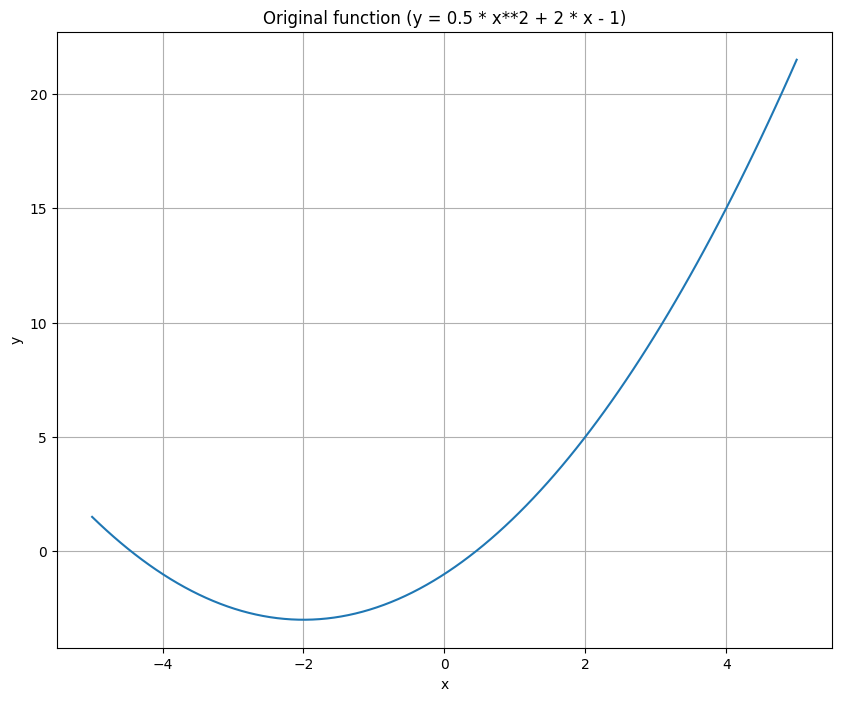

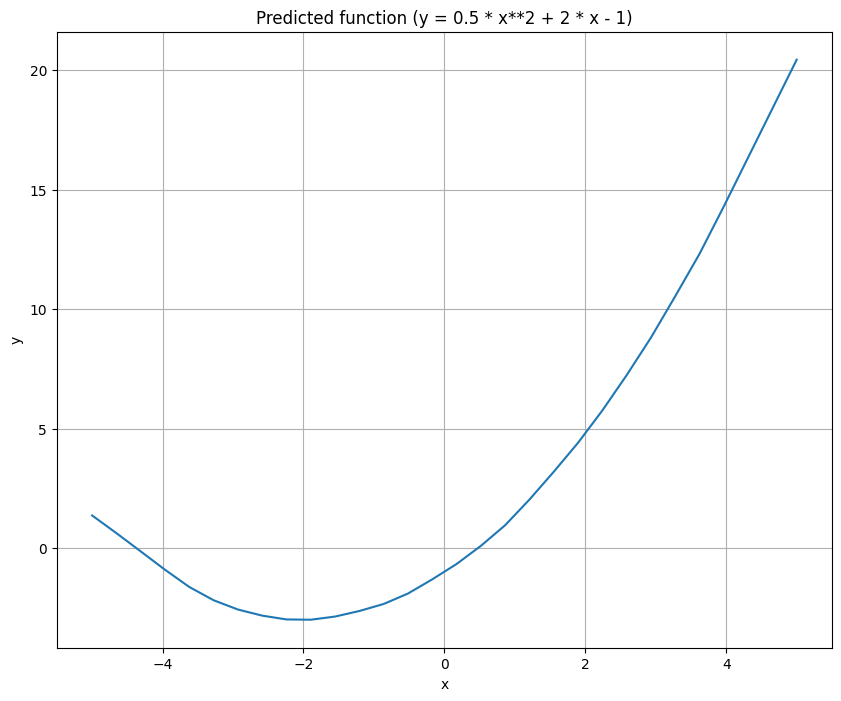

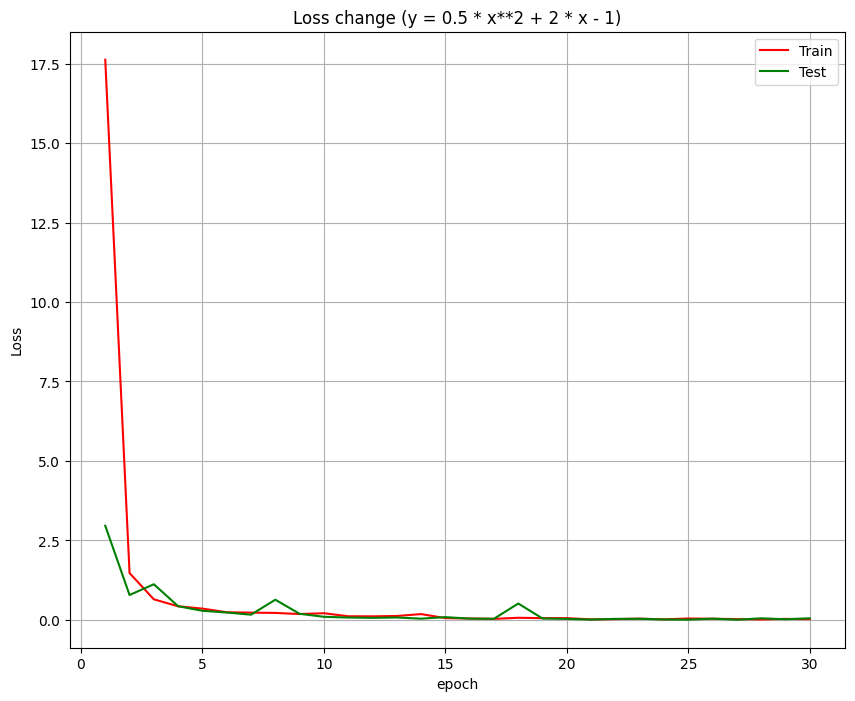

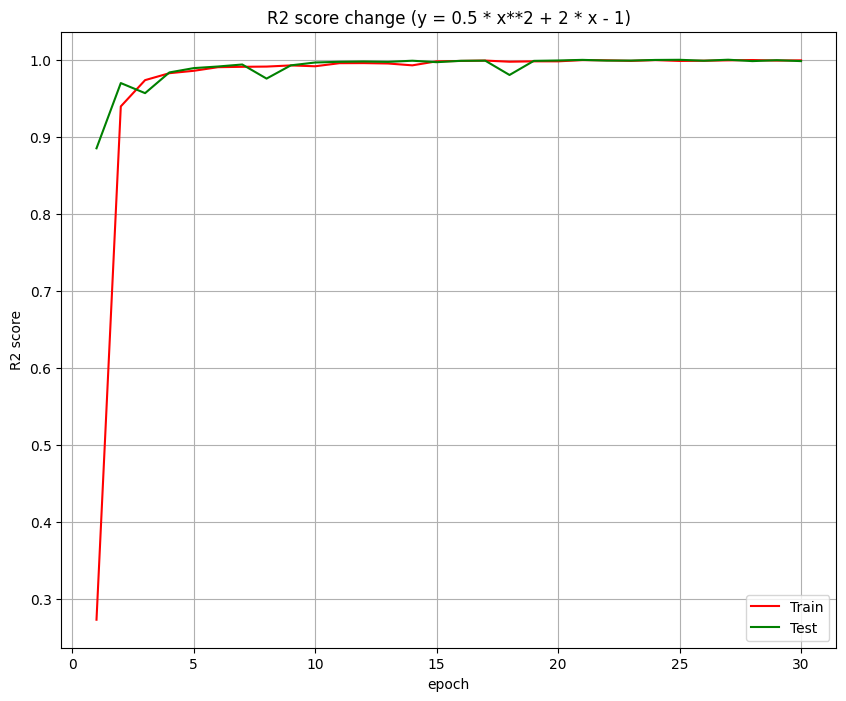

In [12]:
plot_func(
    [d["input"][0].item() for d in train_dataset],
    [d["output"][0].item() for d in train_dataset],
    "Original function (y = 0.5 * x**2 + 2 * x - 1)",
)

plot_func(
    [d["input"][0].item() for d in test_dataset],
    [pred[0].item() for pred in prediction],
    "Predicted function (y = 0.5 * x**2 + 2 * x - 1)"
)

plot_loss(epoch, train_loss, test_loss, 'Loss change (y = 0.5 * x**2 + 2 * x - 1)')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (y = 0.5 * x**2 + 2 * x - 1)')

# Creating model for predicting values of the 3d quadratic function "z = 0.2 * x**2 + 0.2 * y**2" and ploting graphs and changes for loss and r2 score

In [13]:
train_dataset, test_dataset = generate_train_test_data_3d(func_quad_3d)

layers = [
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(2),
    layers,
    optimizer=Adam(),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 10

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=16, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/10, train loss: 4.316, train R2 score: -0.795, test loss: 0.2546, test R2 score: 0.8994
Epoch: 2/10, train loss: 0.143, train R2 score: 0.9405, test loss: 0.0805, test R2 score: 0.9682
Epoch: 3/10, train loss: 0.0481, train R2 score: 0.98, test loss: 0.0348, test R2 score: 0.9862
Epoch: 4/10, train loss: 0.0248, train R2 score: 0.9897, test loss: 0.0187, test R2 score: 0.9926
Epoch: 5/10, train loss: 0.0134, train R2 score: 0.9944, test loss: 0.0113, test R2 score: 0.9955
Epoch: 6/10, train loss: 0.0072, train R2 score: 0.997, test loss: 0.0068, test R2 score: 0.9973
Epoch: 7/10, train loss: 0.0042, train R2 score: 0.9983, test loss: 0.0041, test R2 score: 0.9984
Epoch: 8/10, train loss: 0.0029, train R2 score: 0.9988, test loss: 0.0029, test R2 score: 0.9989
Epoch: 9/10, train loss: 0.0022, train R2 score: 0.9991, test loss: 0.0028, test R2 score: 0.9989
Epoch: 10/10, train loss: 0.002, train R2 score: 0.9992, test loss: 0.0019, test R2 score: 0.9992
--- 14.870235919952393 se

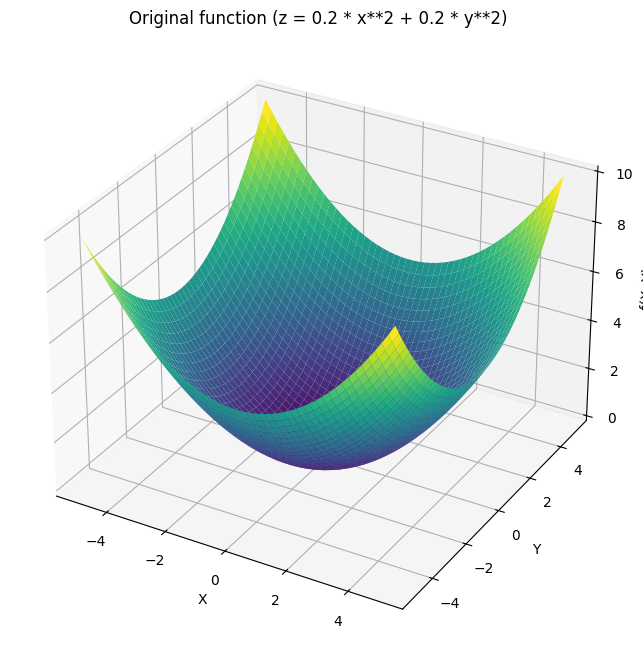

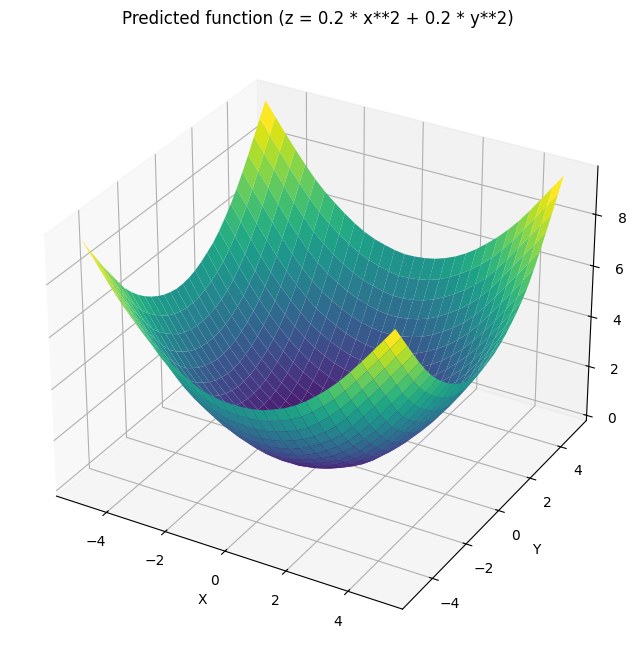

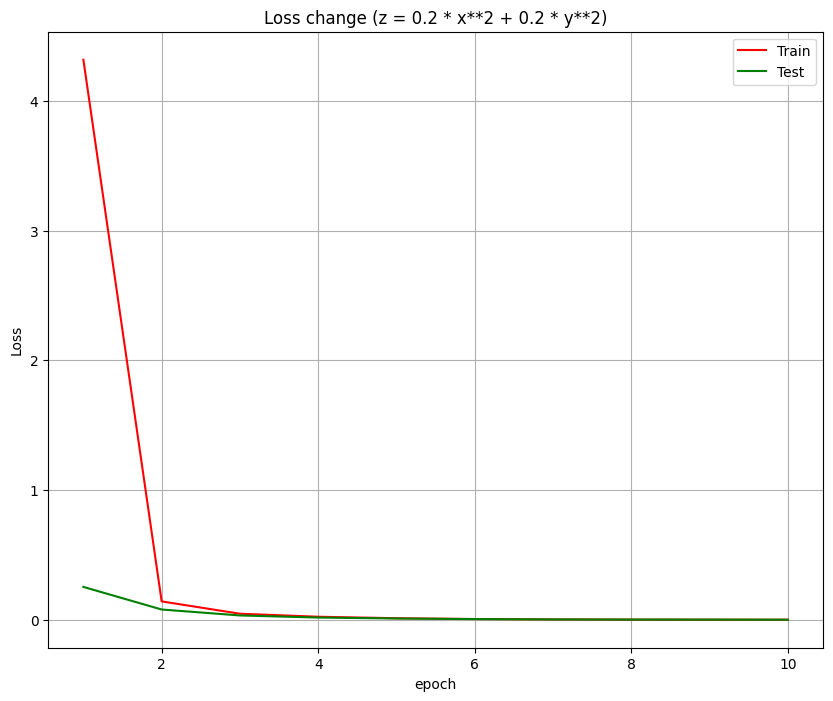

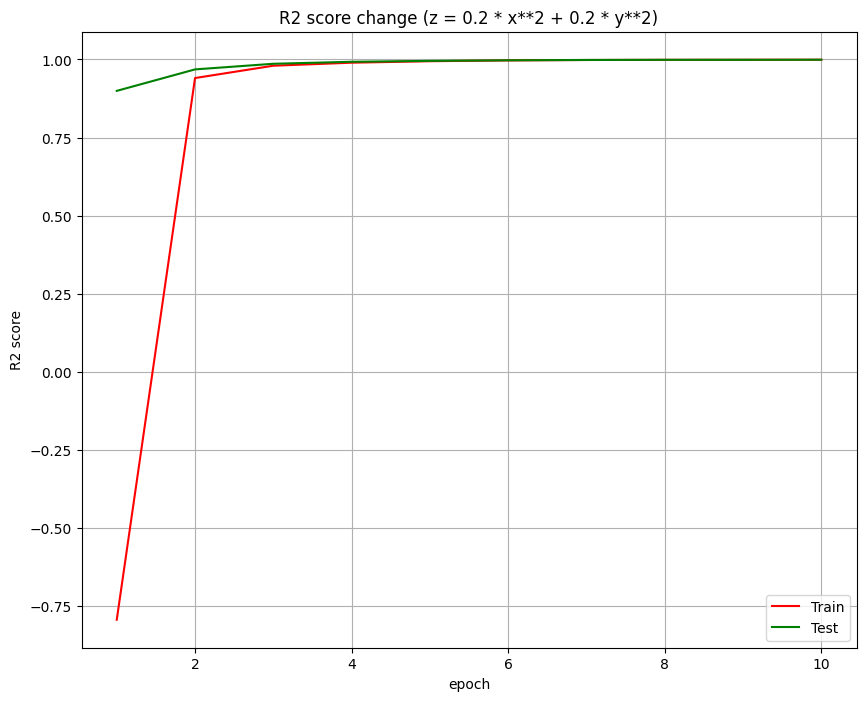

In [14]:
plot_func_3d(
    torch.tensor([[train_dataset[j*50 + i]['input'][0].item() for i in range(50)] for j in range(50)]),
    torch.tensor([[train_dataset[j*50 + i]['input'][1].item() for i in range(50)] for j in range(50)]),
    torch.tensor([[train_dataset[j*50 + i]['output'][0].item() for i in range(50)] for j in range(50)]),
    'Original function (z = 0.2 * x**2 + 0.2 * y**2)'
)

plot_func_3d(
    torch.tensor([[test_dataset[j*30 + i]['input'][0].item() for i in range(30)] for j in range(30)]),
    torch.tensor([[test_dataset[j*30 + i]['input'][1].item() for i in range(30)] for j in range(30)]),
    torch.tensor([[prediction[j*30 + i][0].item() for i in range(30)] for j in range(30)]),
    'Predicted function (z = 0.2 * x**2 + 0.2 * y**2)'
)

plot_loss(epoch, train_loss, test_loss, 'Loss change (z = 0.2 * x**2 + 0.2 * y**2)')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (z = 0.2 * x**2 + 0.2 * y**2)')

# Creating model for predicting values of the 3d function "z = sin(x) + cos(y)" and ploting graphs and changes for loss and r2 score

In [15]:
train_dataset, test_dataset = generate_train_test_data_3d(func_sin_plus_cos_3d)

layers = [
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(2),
    layers,
    optimizer=Adam(),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 10

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=16, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/10, train loss: 0.3413, train R2 score: 0.2941, test loss: 0.2148, test R2 score: 0.557
Epoch: 2/10, train loss: 0.1164, train R2 score: 0.7592, test loss: 0.0768, test R2 score: 0.8415
Epoch: 3/10, train loss: 0.0391, train R2 score: 0.9191, test loss: 0.0259, test R2 score: 0.9467
Epoch: 4/10, train loss: 0.0179, train R2 score: 0.963, test loss: 0.0158, test R2 score: 0.9675
Epoch: 5/10, train loss: 0.0106, train R2 score: 0.978, test loss: 0.0098, test R2 score: 0.9797
Epoch: 6/10, train loss: 0.0065, train R2 score: 0.9866, test loss: 0.0085, test R2 score: 0.9826
Epoch: 7/10, train loss: 0.0054, train R2 score: 0.9889, test loss: 0.006, test R2 score: 0.9876
Epoch: 8/10, train loss: 0.004, train R2 score: 0.9918, test loss: 0.0061, test R2 score: 0.9874
Epoch: 9/10, train loss: 0.0038, train R2 score: 0.9922, test loss: 0.0043, test R2 score: 0.9911
Epoch: 10/10, train loss: 0.0029, train R2 score: 0.9941, test loss: 0.003, test R2 score: 0.9938
--- 14.1731276512146 seco

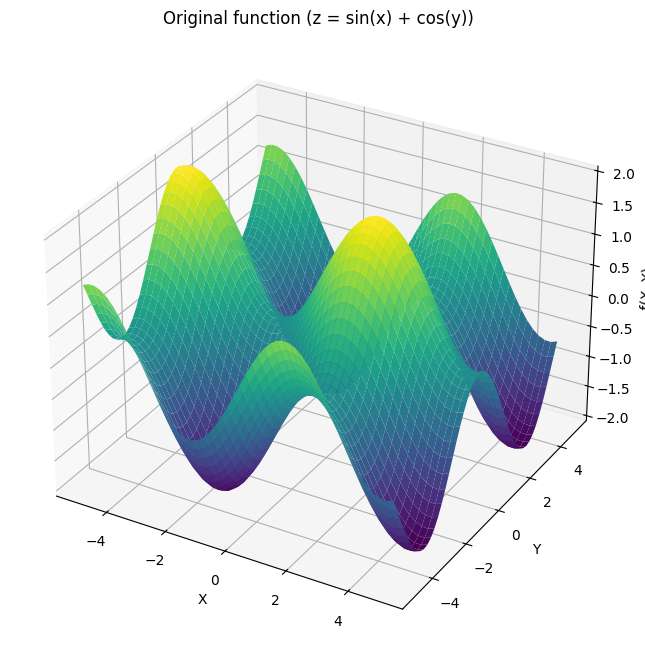

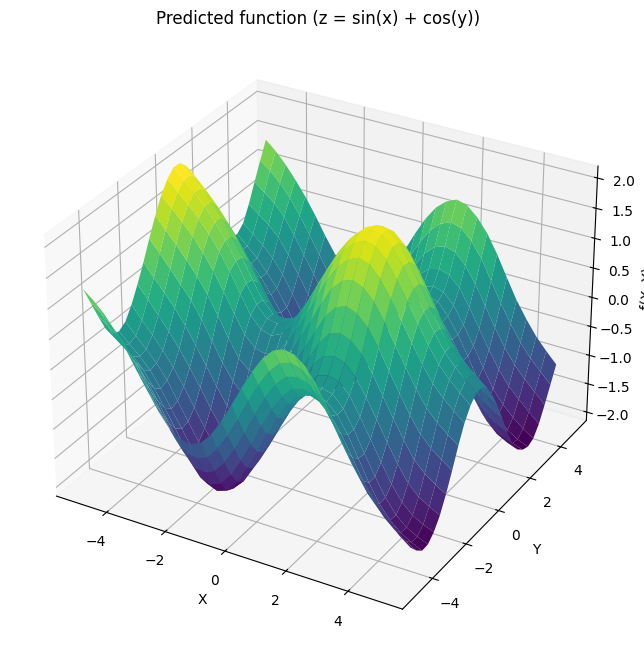

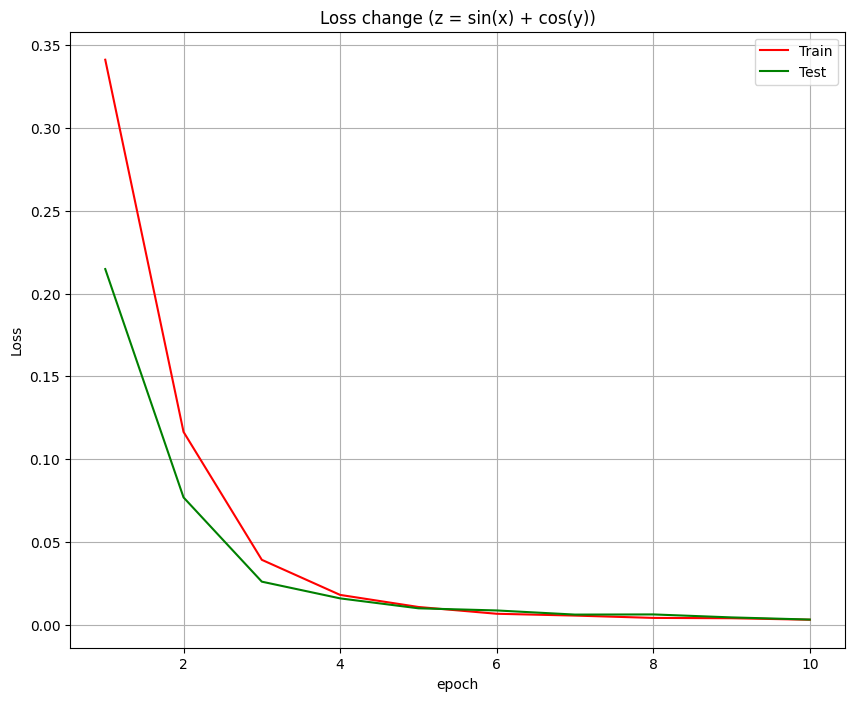

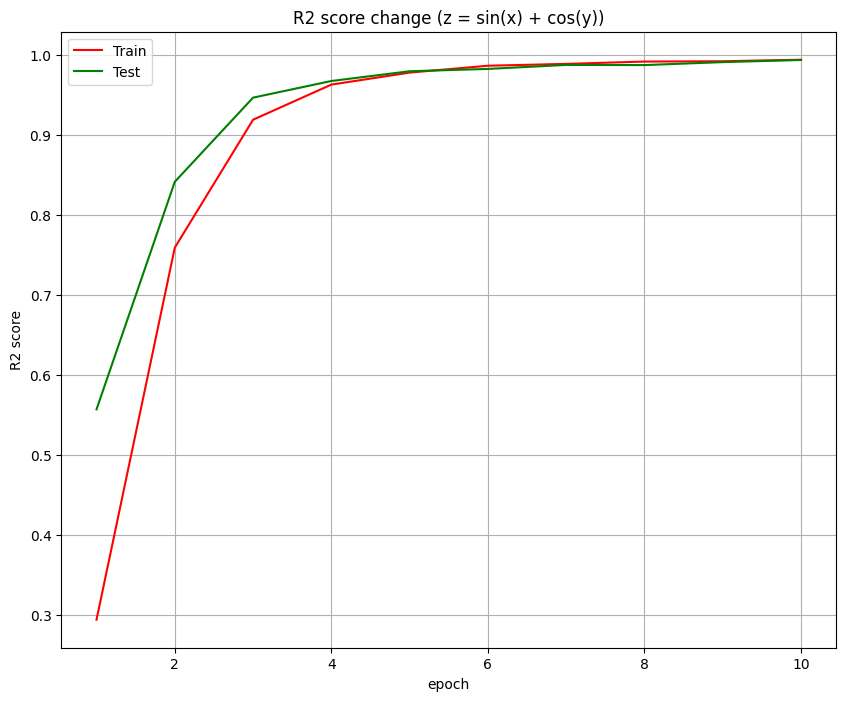

In [16]:
plot_func_3d(
    torch.tensor([[train_dataset[j*50 + i]['input'][0].item() for i in range(50)] for j in range(50)]),
    torch.tensor([[train_dataset[j*50 + i]['input'][1].item() for i in range(50)] for j in range(50)]),
    torch.tensor([[train_dataset[j*50 + i]['output'][0].item() for i in range(50)] for j in range(50)]),
    'Original function (z = sin(x) + cos(y))'
)

plot_func_3d(
    torch.tensor([[test_dataset[j*30 + i]['input'][0].item() for i in range(30)] for j in range(30)]),
    torch.tensor([[test_dataset[j*30 + i]['input'][1].item() for i in range(30)] for j in range(30)]),
    torch.tensor([[prediction[j*30 + i][0].item() for i in range(30)] for j in range(30)]),
    'Predicted function (z = sin(x) + cos(y))'
)

plot_loss(epoch, train_loss, test_loss, 'Loss change (z = sin(x) + cos(y))')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (z = sin(x) + cos(y))')